In [1]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
bostondf = pd.read_csv('boston_house_prices.csv',skiprows=1)

In [3]:
y = bostondf['MEDV']
x = bostondf.drop(columns=['MEDV'])

In [6]:
ridge = Ridge(alpha=10)
neg_mse = cross_val_score(ridge,x,y,scoring='neg_mean_squared_error',cv=5)
mse = -neg_mse
rmse = np.sqrt(mse)
np.mean(rmse)

5.518166280868973

In [11]:
alphas = [0,0.1,1,10,100,200,300,1000]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse = cross_val_score(ridge,x,y,scoring='neg_mean_squared_error',cv=5)
    mse = -neg_mse
    rmse = np.sqrt(mse)
    avg_rmse = np.mean(rmse)
    print(f'alpha:{alpha} \nmse:{mse} \nrmse:{rmse} \navg_rmse:{avg_rmse}')

alpha:0 
mse:[12.46030057 26.04862111 33.07413798 80.76237112 33.31360656] 
rmse:[3.52991509 5.10378498 5.75101191 8.9867887  5.77179405] 
avg_rmse:5.828658946215807
alpha:0.1 
mse:[12.31966805 25.19800734 32.43466024 80.70282254 32.88006851] 
rmse:[3.50993847 5.01976168 5.69514357 8.98347497 5.73411445] 
avg_rmse:5.788486627032413
alpha:1 
mse:[11.7110334  23.58316804 29.69339407 80.22988232 31.11617767] 
rmse:[3.42213872 4.85625041 5.44916453 8.9571135  5.57818767] 
avg_rmse:5.652570965613547
alpha:10 
mse:[11.4217962  24.29446706 28.14355069 74.59916618 28.51714218] 
rmse:[3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ] 
avg_rmse:5.518166280868973
alpha:100 
mse:[12.8247449  27.27923137 34.67968877 52.69431476 22.05052994] 
rmse:[3.5811653  5.22295236 5.88894632 7.25908498 4.69579918] 
avg_rmse:5.329589628472148
alpha:200 
mse:[13.63016837 28.7666567  38.49672823 47.62702106 20.62504707] 
rmse:[3.69190579 5.36345567 6.20457317 6.9012333  4.54148071] 
avg_rmse:5.3405297287823

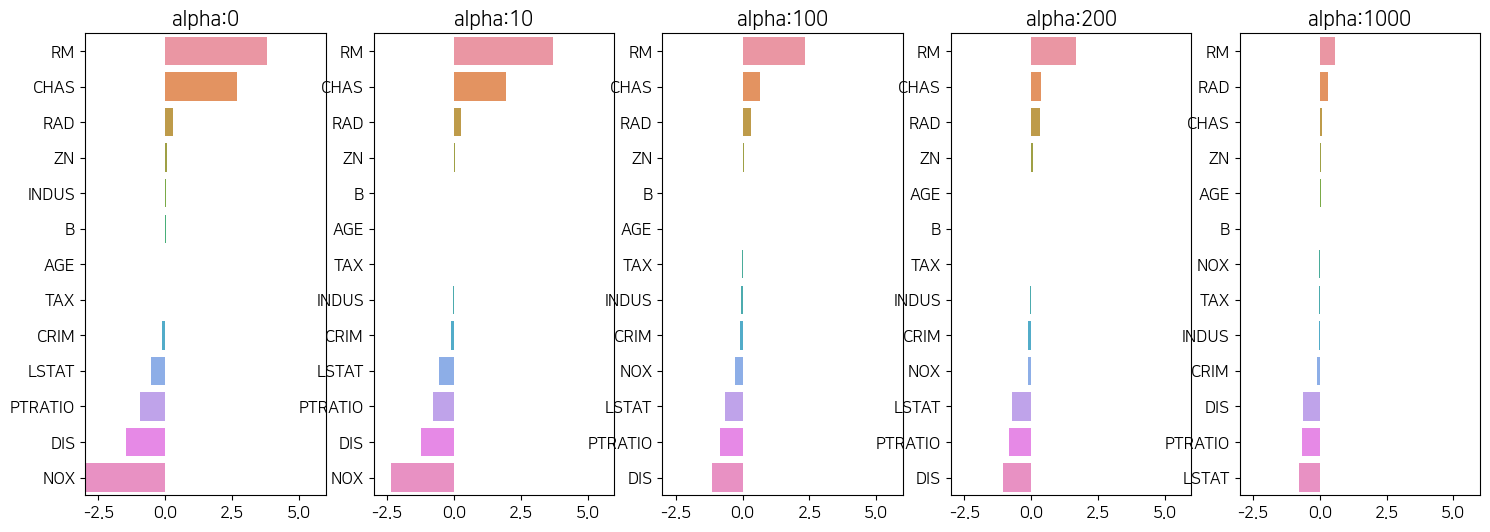

In [18]:
# alphas = [0,0.1,1,10,100]
alphas = [0,10,100,200,1000]
fig,axs = plt.subplots(figsize=(18,6),nrows=1,ncols=5)
coeff_df = pd.DataFrame()
for pos,alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x,y)
    coeff = pd.Series(data=ridge.coef_,index=x.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname]=coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])
plt.show()

In [19]:
coeff_df.columns

Index(['alpha:0', 'alpha:10', 'alpha:100', 'alpha:200', 'alpha:1000'], dtype='object')

In [21]:
coeff_df.sort_values(by=['alpha:0', 'alpha:10', 'alpha:100', 'alpha:200', 'alpha:1000'],ascending=False)

,alpha:0,alpha:10,alpha:100,alpha:200,alpha:1000
RM,3.809865,3.702272,2.334536,1.672973,0.568555
CHAS,2.686734,1.952021,0.638335,0.377547,0.101449
RAD,0.306049,0.279596,0.315358,0.327895,0.310743
ZN,0.046420,0.049579,0.054496,0.055547,0.054378
INDUS,0.020559,-0.042962,-0.052826,-0.051809,-0.036336
B,0.009312,0.010037,0.009393,0.008949,0.007990
AGE,0.000692,-0.010707,0.001212,0.009233,0.030573
TAX,-0.012335,-0.013993,-0.015856,-0.016437,-0.016602
CRIM,-0.108011,-0.101435,-0.102202,-0.100830,-0.090768
LSTAT,-0.524758,-0.559366,-0.660764,-0.706464,-0.763721


In [22]:
from sklearn.linear_model import Lasso,ElasticNet

In [34]:
def get_linear_reg_eval(model_name,params,x,y,verbose=True,return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose:print('###',model_name,'###')
    for param in params:
        if model_name == 'Ridge':model = Ridge(alpha=param)
        elif model_name == 'Lasso':model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':model = ElasticNet(alpha=param,l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5)
        avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
        print(f'alpha {param} rmse평균:{avg_rmse}')
        model.fit(x,y)
        if return_coeff:
            coeff = pd.Series(data=model.coef_,index=x.columns)
            colname= 'alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df

In [35]:
lasso_alphas = [0.03,0.05,0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',lasso_alphas,x,y)

### Lasso ###
alpha 0.03 rmse평균:5.6440696227462315
alpha 0.05 rmse평균:5.627585999402108
alpha 0.07 rmse평균:5.612284267526676
alpha 0.1 rmse평균:5.615116035266935
alpha 0.5 rmse평균:5.6691234095948975
alpha 1 rmse평균:5.776020813823375
alpha 3 rmse평균:6.188763210800905


In [41]:
coeff_lasso_df.sort_values(by=list(coeff_lasso_df.columns),ascending=False)

,alpha:0.03,alpha:0.05,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.825939,3.836618,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,2.131692,1.761631,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.285037,0.271034,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.047863,0.048826,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.009840,0.010193,0.010248,0.010249,0.009469,0.008247,0.006510
AGE,-0.006839,-0.011858,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.013351,-0.014028,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.016592,-0.041355,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.102566,-0.098935,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
LSTAT,-0.542254,-0.553925,-0.560431,-0.568769,-0.656290,-0.761115,-0.807679


In [42]:
elastic_alphas = [0.07,0.1,0.5,1,3] 
coeff_elastic_df = get_linear_reg_eval('ElasticNet',elastic_alphas,x,y)

### ElasticNet ###
alpha 0.07 rmse평균:5.541654347348139
alpha 0.1 rmse평균:5.52592849629491
alpha 0.5 rmse평균:5.466748649445586
alpha 1 rmse평균:5.596874445109748
alpha 3 rmse평균:6.068121638621163


In [43]:
coeff_elastic_df.sort_values(by=list(coeff_elastic_df.columns),ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [50]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [58]:
def get_scaled_data(method='None',p_degree=None,input_data=None):
    if method == 'Standard':      scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':      scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':         scaled_data = np.log1p(input_data)
    else: scaled_data = input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [59]:
alphas=[0.1,1,10,100]
scale_methods = [(None,None),
                ('Standard',None),
                ('Standard',2),
                ('MinMax',None),
                ('MinMax',2),
                ('Log',None)]
for scaled_method in scale_methods:
    x_scaled = get_scaled_data(scaled_method[0],scaled_method[1],x)
    get_linear_reg_eval('Ridge',alphas,x_scaled,y,return_coeff=False)

### Ridge ###
alpha 0.1 rmse평균:5.788486627032413
alpha 1 rmse평균:5.652570965613547
alpha 10 rmse평균:5.518166280868973
alpha 100 rmse평균:5.329589628472148
### Ridge ###
alpha 0.1 rmse평균:5.825992799389444
alpha 1 rmse평균:5.802889517257739
alpha 10 rmse평균:5.636831222559071
alpha 100 rmse평균:5.421374711794966
### Ridge ###
alpha 0.1 rmse평균:8.827235873005337
alpha 1 rmse평균:6.871287525963086
alpha 10 rmse평균:5.484870425533412
alpha 100 rmse평균:4.634437778261924
### Ridge ###
alpha 0.1 rmse평균:5.76357022528831
alpha 1 rmse평균:5.465045081564942
alpha 10 rmse평균:5.754163637679423
alpha 100 rmse평균:7.634919863623539
### Ridge ###
alpha 0.1 rmse평균:5.297560003126938
alpha 1 rmse평균:4.322660371524895
alpha 10 rmse평균:5.185204257580535
alpha 100 rmse평균:6.5378668897043655
### Ridge ###
alpha 0.1 rmse평균:4.770429614681661
alpha 1 rmse평균:4.676227018966876
alpha 10 rmse평균:4.836439992635266
alpha 100 rmse평균:6.2409162327190355
